<a href="https://colab.research.google.com/github/masterinfo/COURS_ELEARNING/blob/master/hierarchical_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 - Clustering Models
## Segment 2 - Hierarchial methods
#### Setting up for clustering analysis

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Hierarchical clustering is an unsupervised machine learning method that you can use to predict subgroupings based on differences between data points and their nearest neighbor. Each data point is linked to its neighbor that is most nearby according to the distance metric that you choose

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm

In [5]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [6]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

<ipython-input-6-6c4152fdcca5>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Figure size 1000x300 with 0 Axes>

In [9]:
address = '/content/drive/MyDrive/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X = cars[['mpg', 'disp', 'hp', 'wt']].values

y = cars.iloc[:,(9)].values

In [15]:
y

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [17]:
y1= cars.iloc[:,9].values
y1

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [14]:
X

array([[ 21.   , 160.   , 110.   ,   2.62 ],
       [ 21.   , 160.   , 110.   ,   2.875],
       [ 22.8  , 108.   ,  93.   ,   2.32 ],
       [ 21.4  , 258.   , 110.   ,   3.215],
       [ 18.7  , 360.   , 175.   ,   3.44 ],
       [ 18.1  , 225.   , 105.   ,   3.46 ],
       [ 14.3  , 360.   , 245.   ,   3.57 ],
       [ 24.4  , 146.7  ,  62.   ,   3.19 ],
       [ 22.8  , 140.8  ,  95.   ,   3.15 ],
       [ 19.2  , 167.6  , 123.   ,   3.44 ],
       [ 17.8  , 167.6  , 123.   ,   3.44 ],
       [ 16.4  , 275.8  , 180.   ,   4.07 ],
       [ 17.3  , 275.8  , 180.   ,   3.73 ],
       [ 15.2  , 275.8  , 180.   ,   3.78 ],
       [ 10.4  , 472.   , 205.   ,   5.25 ],
       [ 10.4  , 460.   , 215.   ,   5.424],
       [ 14.7  , 440.   , 230.   ,   5.345],
       [ 32.4  ,  78.7  ,  66.   ,   2.2  ],
       [ 30.4  ,  75.7  ,  52.   ,   1.615],
       [ 33.9  ,  71.1  ,  65.   ,   1.835],
       [ 21.5  , 120.1  ,  97.   ,   2.465],
       [ 15.5  , 318.   , 150.   ,   3.52 ],
       [ 1

In [13]:
cars.describe

<bound method NDFrame.describe of               car_names   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4 

### Using scipy to generate dendrograms

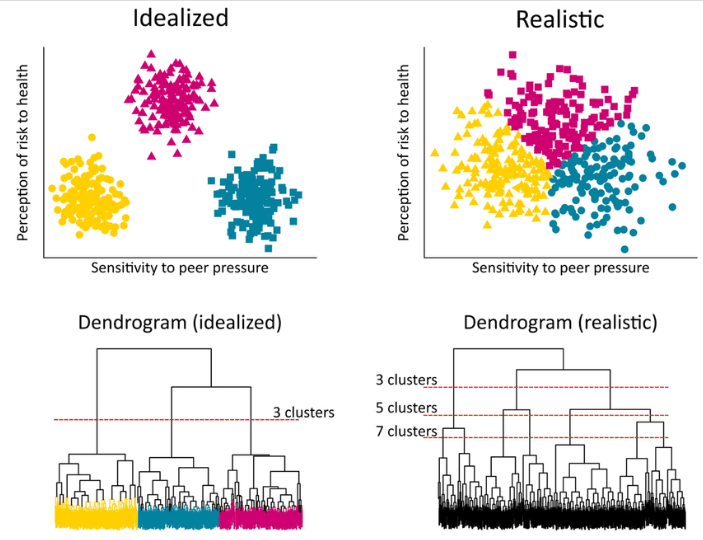

here are clearly three clusters detected by the k-means algorithm, perfectly separated from one another. The dendrogram of these data in the bottom left also shows a clear point at which the tree can be 'cut' to define the clusters (as done in hierarchical clustering). In the real world (right side), however, variables are often normally distributed and noisy. K-means will still identify three segments because that number of segments was specified in advance, but clearly there is little actual 'clustering' of people. Similarly, the dendrogram of these data suggests potential cut-off points at several heights that seem equally reasonable.

K- means clustering a simply a division of the set of data objects into non-overlapping subsets (clusters) such that each data object is in exactly one subset). A hierarchical clustering is a set of nested clusters that are arranged as a tree

In [10]:
Z = linkage(X, 'ward')

# Ward´s linkage is a method for hierarchical cluster analysis . The idea has much in common with analysis of variance (ANOVA). The linkage function specifying the distance between two clusters
#  is computed as the increase in the "error sum of squares" (ESS) after fusing two clusters into a single cluster.



In [11]:
Z

array([[  0.    ,   1.    ,   0.255 ,   2.    ],
       [ 11.    ,  12.    ,   0.9621,   2.    ],
       [  9.    ,  10.    ,   1.4   ,   2.    ],
       [ 13.    ,  33.    ,   1.9103,   3.    ],
       [ 17.    ,  25.    ,   5.1157,   2.    ],
       [ 20.    ,  26.    ,   7.5097,   2.    ],
       [  6.    ,  23.    ,  10.0535,   2.    ],
       [ 19.    ,  36.    ,  10.1666,   3.    ],
       [ 21.    ,  22.    ,  14.0035,   2.    ],
       [  2.    ,  37.    ,  14.1771,   3.    ],
       [ 14.    ,  15.    ,  15.6215,   2.    ],
       [ 18.    ,  39.    ,  16.7875,   4.    ],
       [ 31.    ,  41.    ,  19.8678,   4.    ],
       [ 32.    ,  34.    ,  21.6097,   4.    ],
       [ 28.    ,  38.    ,  22.5473,   3.    ],
       [  8.    ,  44.    ,  29.8447,   5.    ],
       [  3.    ,   5.    ,  33.5403,   2.    ],
       [ 16.    ,  42.    ,  38.201 ,   3.    ],
       [  4.    ,  24.    ,  40.0052,   2.    ],
       [ 27.    ,  47.    ,  41.616 ,   6.    ],
       [  7.    ,  5

clustering is an unsupervised machine learning method that you can use to predict subgroupings based on differences between data points and their nearest neighbor. Each data point is linked to its neighbor that is most nearby according to the distance metric that you choose. I

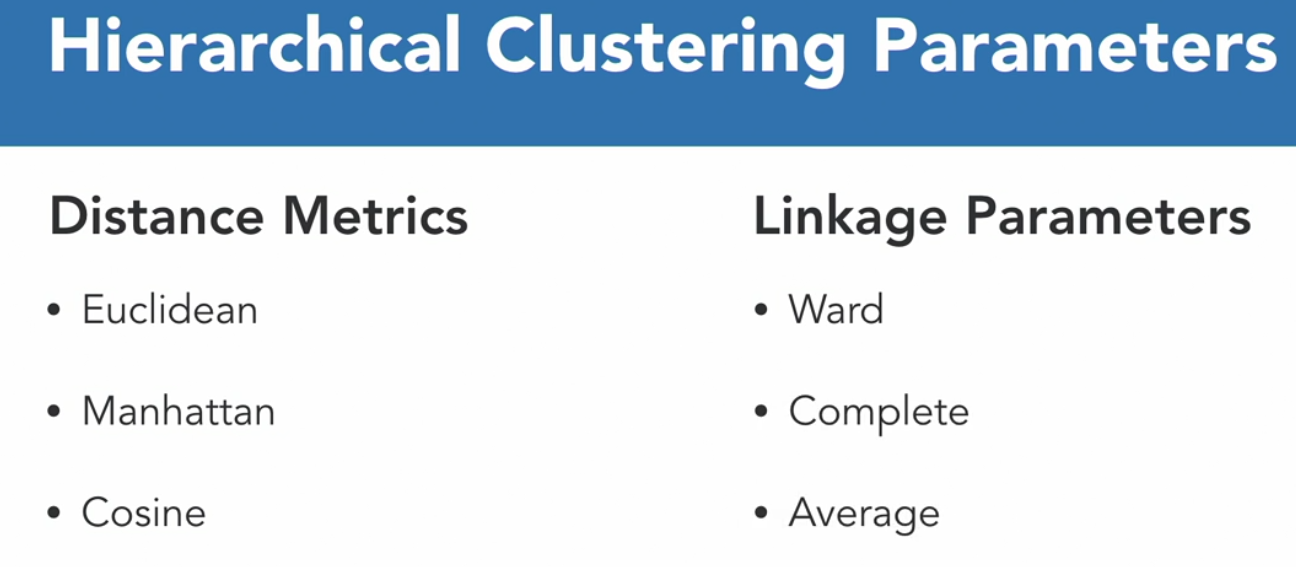

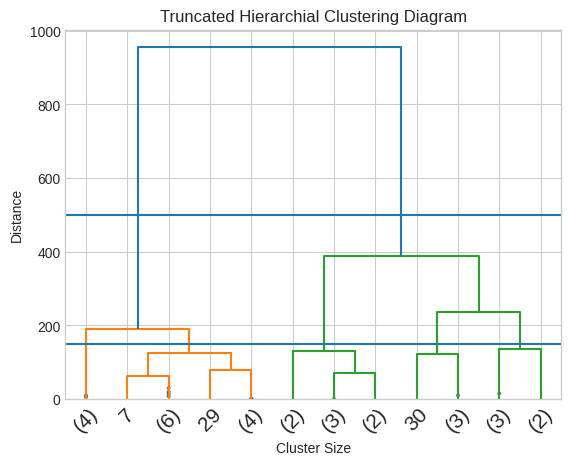

In [12]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)
#cluster max
#lastp=The last p non-singleton clusters formed in the linkage are the only non-leaf nodes in the linkage;
# show_contracted :When True the heights of non-singleton nodes contracted into a leaf node
plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

We know we're working with a cars dataset and that there's the am variable. Am assumes one of two positions. It's either a zero or a one for automatic or manual transmission. Based on that and the results I'm seeing here in the dendrogram, I'm going to pick two as the number of clusters to use in our model. You can see from our dendrogram, if we're using a two-cluster model, that's really saying that we have a distance between data points and its nearest neighbors, and that distance should be set at a maximum of 400.

---



---



 Imagine that you want a maximum distance between a point and its nearest neighbor. You want that maximum distance to be 150. You would plot out your dendrogram and then you would set a line where Y is equal to 150.

  Then along that line, you look at each point where your dendrogram intersects the Y equal 150 line. So you have one, two, three, four, five. If you wanted to have a maximum distance of 150 between each point and its nearest neighbor, you would have five cluster centers.
  
  You could also set the maximum distance between points to be 500. And in that case, you would have two cluster centers.

## Generating hierarchical clusters

In [18]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.78125

In [19]:
Hclustering

AgglomerativeClustering(affinity='euclidean')

In [20]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.78125

In [21]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.71875

In [22]:
#the last one is less performant